<a href="https://colab.research.google.com/github/Raquelll77/tarea2.2_IA/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd

In [195]:
df = pd.read_csv('./housing.csv')


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [178]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [179]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

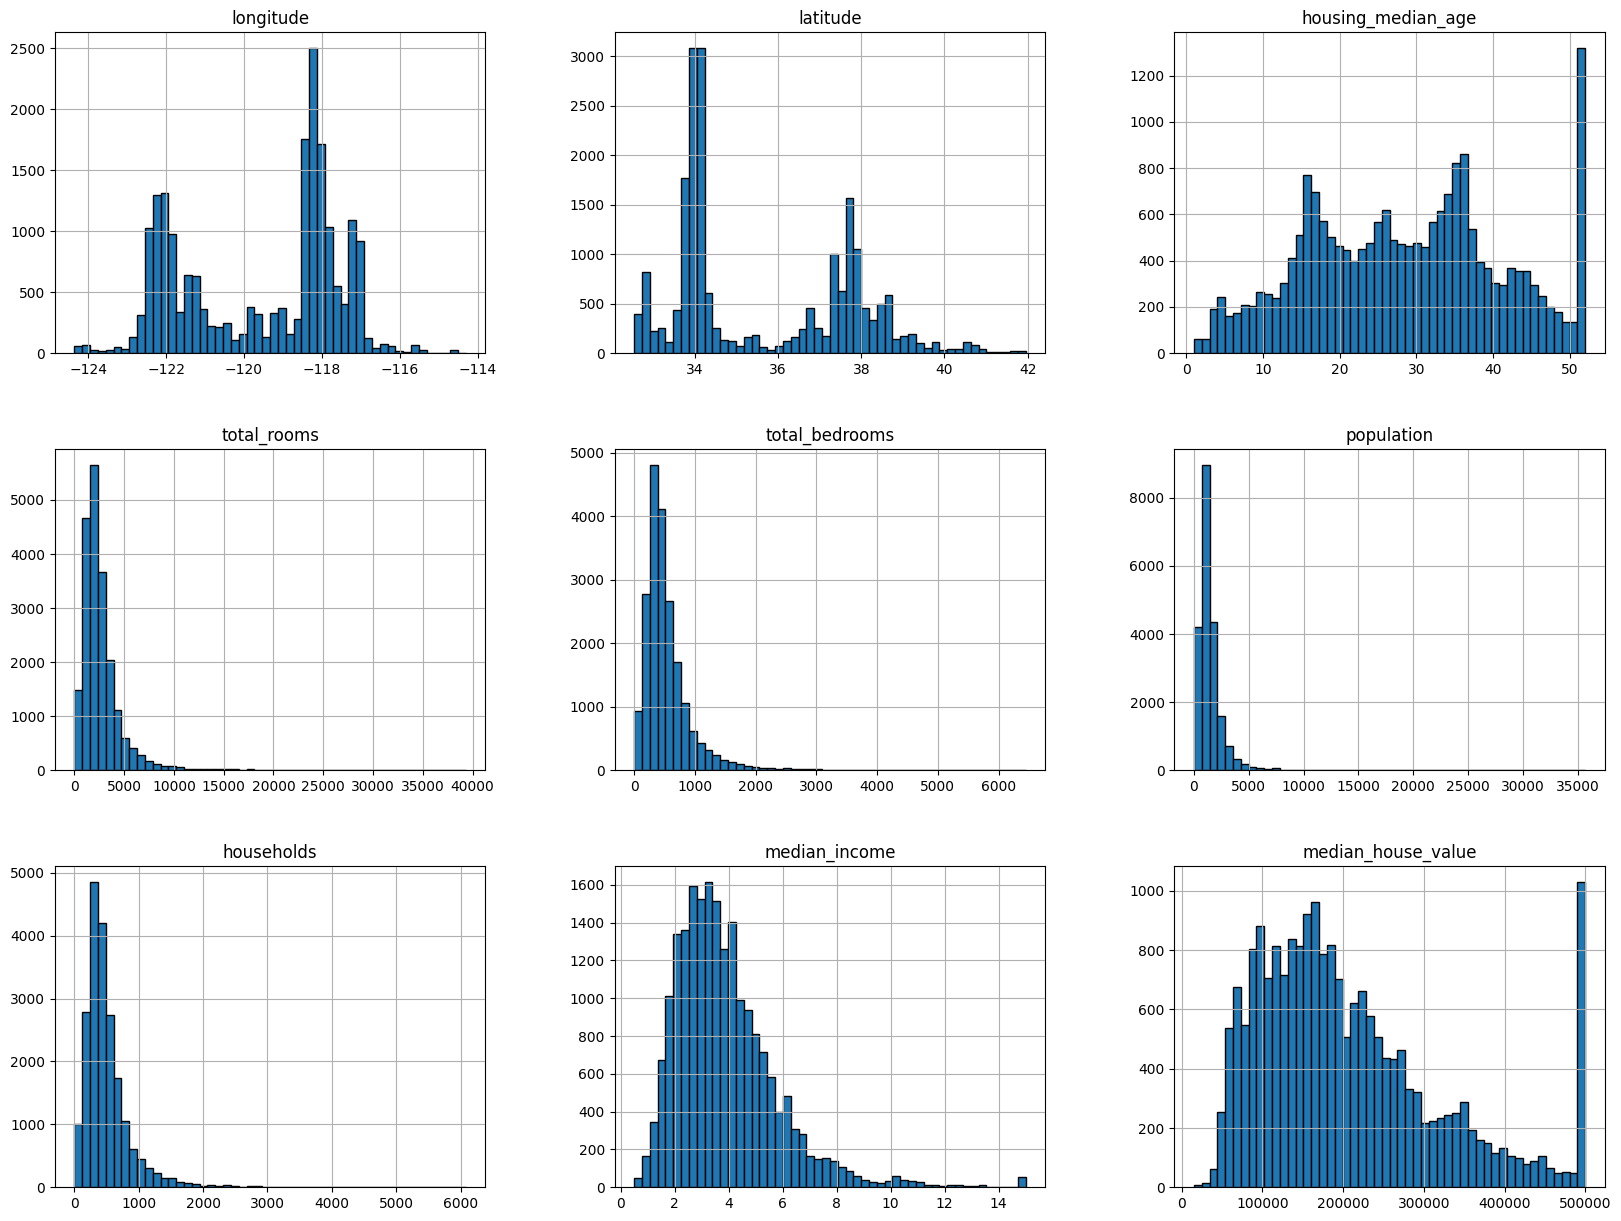

In [180]:

df.hist(bins=50, figsize=(20,15), edgecolor='black')

In [196]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Eliminar valores atípicos en median_house_value y otras variables
df = df[df['median_house_value'] < 500000]  # Filtrar el límite superior en el precio
df = df[df['median_income'] < 15]  # Filtrar ingresos atípicos
df = df[df['housing_median_age'] < 50]

# Crear nuevas características relacionadas
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Eliminar columnas menos relevantes
df = df.drop(['total_rooms', 'total_bedrooms', 'population'], axis=1)

# Convertir 'ocean_proximity' en variables dummy
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df =df.dropna()

# Separar variables independientes y dependiente
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones y calcular el score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Score: {r2:.2f}")
print(f"Errores: {rmse:.2f}")

from sklearn.ensemble import RandomForestRegressor


model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# Realizar predicciones y calcular el score
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"Errores: {rmse:.2f}")


Score: 0.65
Errores: 56931.28
R2 Score: 0.81
Errores: 41438.30


¿El resultado fue mejor o peor?
el resultado fue mejor pero usando el modelo de regresion lineal apenas significativamente, con las modificaciones en mi caso paso de 0.57 a 0.65

¿Por qué crees que es así? Por qué son necesarios los cambios aplicados
(fundamento del porqué afecta esos cambios)

Pues trate de crear nuevas relaciones como las columnas rooms_per_household y population_per_household ya que estas ayudan a capturar mejor la información latente en los datos, como el tamaño relativo de los hogares o la cantidad de personas por hogar, lo cual tiene un impacto en el valor de las propiedades.
Eliminación de valores atípicos: Los valores atípicos en variables como median_house_value o housing_median_age pueden introducir sesgo en los modelos lineales, ya que los extremos pueden afectar la pendiente de la línea ajustada. Al eliminarlos, el modelo pudo centrarse en la mayoría de los datos sin verse distorsionado por valores extremos.
Normalización de los datos: Escalar las características a un rango similar ayuda en modelos lineales, ya que evita que una variable con un rango más amplio domine en la predicción.
Eliminación de límites fijos: Cuando los datos contienen límites (como el precio de 500,000 o la antigüedad de 50 años), esos valores pueden distorsionar los resultados de un modelo lineal. En un modelo no lineal como RandomForestRegressor, estos límites tienen un efecto menos pronunciado, ya que el modelo se adapta de manera independiente a cada subconjunto de datos.

Dado que los precios de las viviendas y las características como antigüedad o cercanía al océano probablemente no sigan una relación lineal simple, el modelo lineal no es suficiente para capturar la complejidad en los datos. En cambio, el RandomForestRegressor puede modelar mejor estas complejidades porque utiliza múltiples árboles de decisión y los combina para mejorar la precisión por lo cual este ultimo dio un mejor resultado.